# Upper Confidence Bound (UCB)

Analysing the performance of 10 advertisements based on interaction

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Data/Ads_CTR_Optimisation.csv')
display(dataset.head(), dataset.shape)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


(10000, 10)

## Implementing UCB

In [4]:
import math

#setup lengths of dataset
N = dataset.shape[0]
d = dataset.shape[1]

#list initialising
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0


for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
            
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
            
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [6]:
ads_selected[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
numbers_of_selections

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]

In [8]:
sums_of_rewards

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

In [9]:
total_reward

2178

## Visualising the results

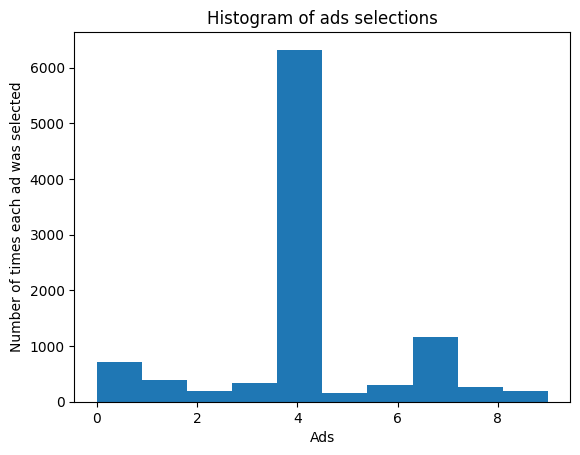

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## Compare to Actual Clicks

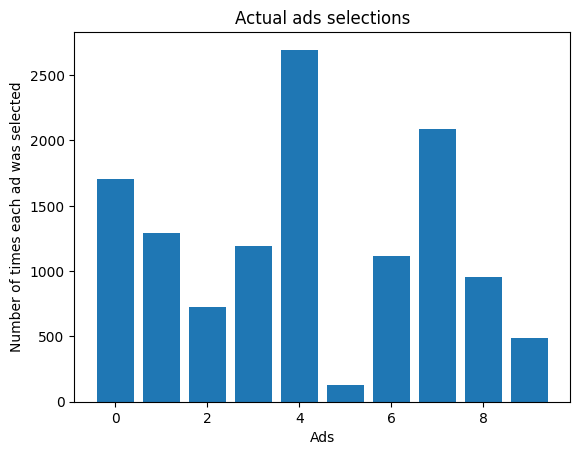

In [11]:
plt.bar(range(0,10), dataset.sum(axis=0).values)
plt.title('Actual ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Ad 4 was indeed the most clicked add, as identified by this Reinforcement Learning.